In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing & exploring the data 

In [3]:
data = pd.read_csv('./diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'] = data['Outcome'].astype('category')

Small dataset - big and more complicated ML models might not be a right fit 

In [5]:
data.shape

(768, 9)

All variables are complete, without any null values - no need for data imputation

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


Slightly unrepresented outcome = 1 --> some ML models like logistic regression are sensitive to disproportional data, meanwhile decision trees and random forests can process the data without major problems

In [7]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Exploring the distribution of variables

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


Right skewness of variables: Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction, Age --> eligible for transformation (bining, applying mathematical functions to improve the distribution)

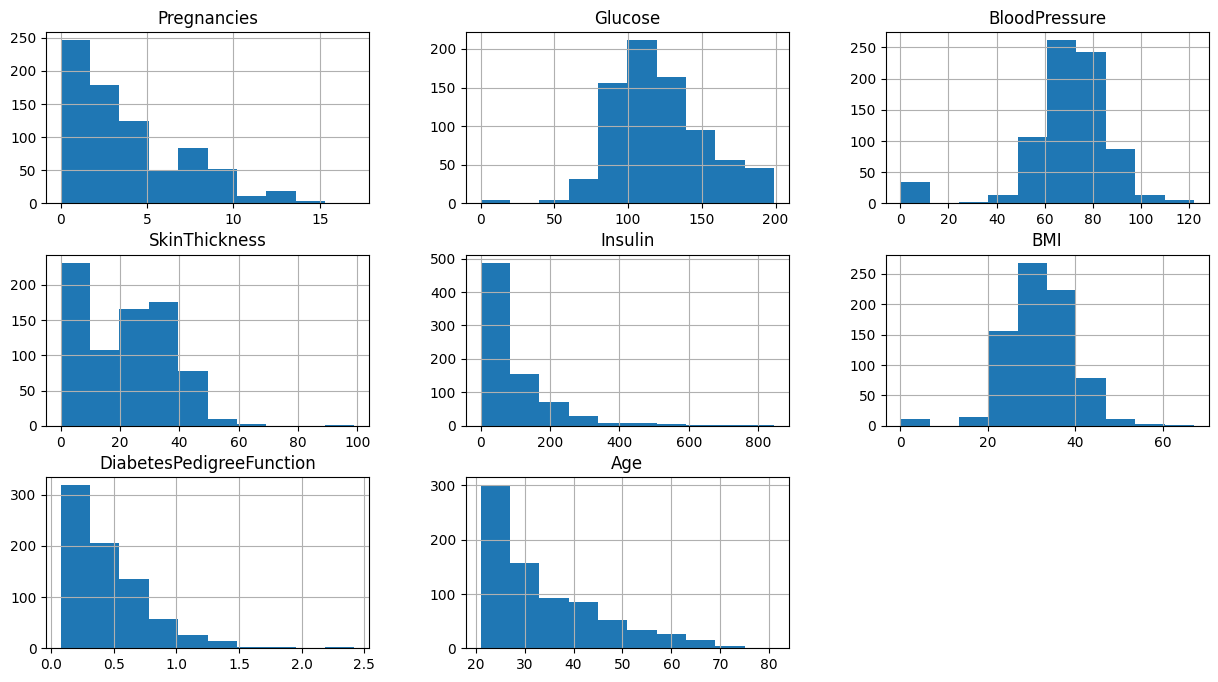

In [9]:
data.hist(bins = 10, figsize = (15, 8))
plt.show()

Is an insulin value of 0 always combined with diabetes? --> Based on the plot below we can see that there are both groups of patients (with diabetes or not) who share the insulin value of 0, or values close to 0. Therefore, the insulin value of 0 is not always combined with diabetes.

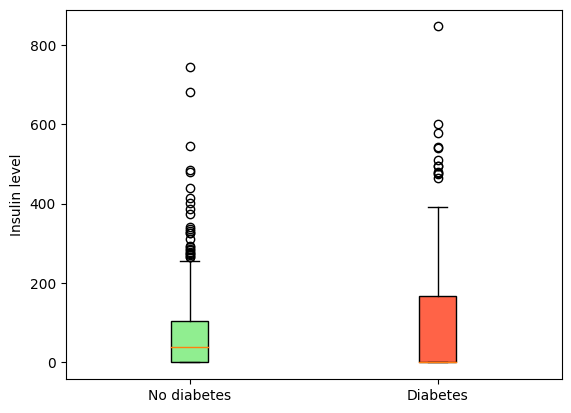

In [10]:
data_outcome_zero = np.array(data['Insulin'][data['Outcome'] == 0])
data_outcome_one = np.array(data['Insulin'][data['Outcome'] == 1])

outcomes = [data_outcome_zero, data_outcome_one]
labels = ["No diabetes", "Diabetes"]
colors = ["lightgreen", "tomato"]

fig, ax = plt.subplots()
ax.set_ylabel("Insulin level")

bplot = ax.boxplot(outcomes,
                   patch_artist=True,
                   labels=labels)

for patch, color in zip(bplot["boxes"], colors):
    patch.set_facecolor(color)
    
plt.show()

The simple calculation of the percentage of patients with no diabetes with insulin level of 0 proves the upper claim - there is a quite big portion of people who have the insulin leve of 0 while not having diabetes

In [11]:
print(f"Percentage of patients with insulin level 0 and no diabetes to the total number of patients with no diabetes is: {round(data[(data['Outcome'] == 0) & (data['Insulin'] == 0)].shape[0] / data[data['Outcome'] == 0].shape[0] * 100, 2)}%")

Percentage of patients with insulin level 0 and no diabetes to the total number of patients with no diabetes is: 47.2%


### Exploring the relationship between the features - checking the correlation

In [12]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


The variables should be correlated among each other as least as possible and they should be correlated with the target variable as much as possible - on the triangle correlation heatmap below we can see that the correlation of the variables among each other is low. Just one pair of variables has a correlation value of 0.54 which is considered to be a moderate correlation:
* Age & Pregnancies

The correlations of the features in our data set are low to moderate so there is no need to delete any variable.

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

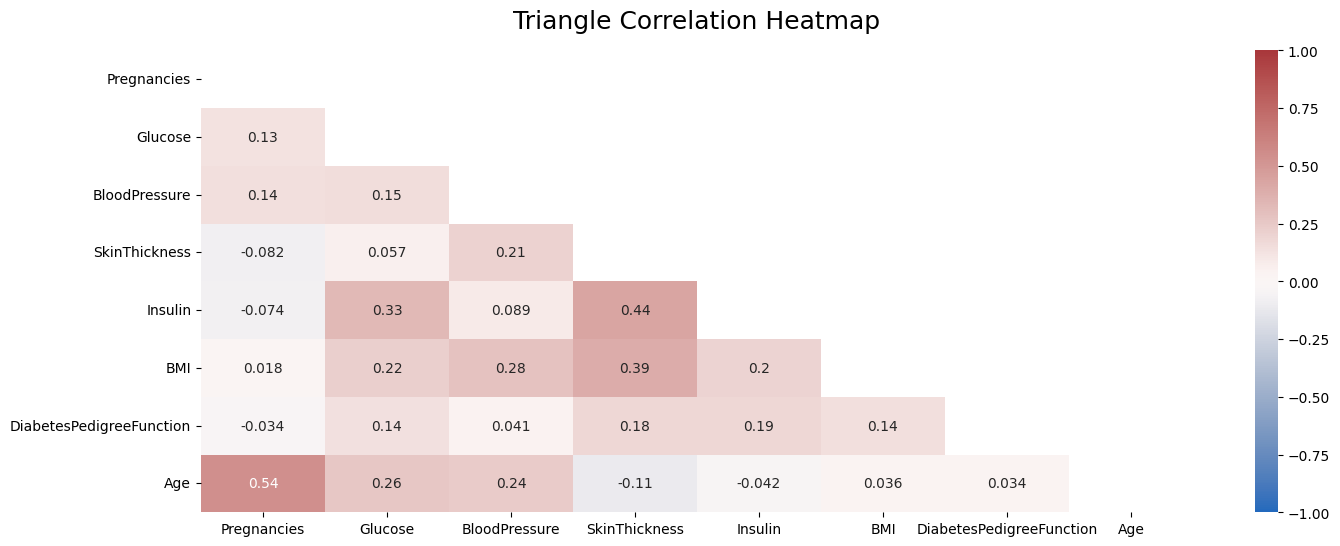

In [13]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### Exploring the relationship of the features with target variable

In [14]:
data_outcome_zero_pregnancies = np.array(data['Pregnancies'][data['Outcome'] == 0])
data_outcome_one_pregnancies = np.array(data['Pregnancies'][data['Outcome'] == 1])

data_outcome_zero_glucose = np.array(data['Glucose'][data['Outcome'] == 0])
data_outcome_one_glucose = np.array(data['Glucose'][data['Outcome'] == 1])

data_outcome_zero_blood_pressure = np.array(data['BloodPressure'][data['Outcome'] == 0])
data_outcome_one_blood_pressure = np.array(data['BloodPressure'][data['Outcome'] == 1])

data_outcome_zero_skin_thickness = np.array(data['SkinThickness'][data['Outcome'] == 0])
data_outcome_one_skin_thickness = np.array(data['SkinThickness'][data['Outcome'] == 1])

data_outcome_zero_insulin = np.array(data['Insulin'][data['Outcome'] == 0])
data_outcome_one_insulin = np.array(data['Insulin'][data['Outcome'] == 1])

data_outcome_zero_bmi = np.array(data['BMI'][data['Outcome'] == 0])
data_outcome_one_bmi = np.array(data['BMI'][data['Outcome'] == 1])

data_outcome_zero_dpf = np.array(data['DiabetesPedigreeFunction'][data['Outcome'] == 0])
data_outcome_one_dpf = np.array(data['DiabetesPedigreeFunction'][data['Outcome'] == 1])

data_outcome_zero_age = np.array(data['Age'][data['Outcome'] == 0])
data_outcome_one_age = np.array(data['Age'][data['Outcome'] == 1])

In [15]:
outcomes_pregnancies = [data_outcome_zero_pregnancies, data_outcome_one_pregnancies]
outcomes_glucose = [data_outcome_zero_glucose, data_outcome_one_glucose]
outcomes_blood_pressure = [data_outcome_zero_blood_pressure, data_outcome_one_blood_pressure]
outcomes_skin_thickness = [data_outcome_zero_skin_thickness, data_outcome_one_skin_thickness]
outcomes_insulin = [data_outcome_zero_insulin, data_outcome_one_insulin]
outcomes_bmi = [data_outcome_zero_bmi, data_outcome_one_bmi]
outcomes_dpf = [data_outcome_zero_dpf, data_outcome_one_dpf]
outcomes_age = [data_outcome_zero_age, data_outcome_one_age]

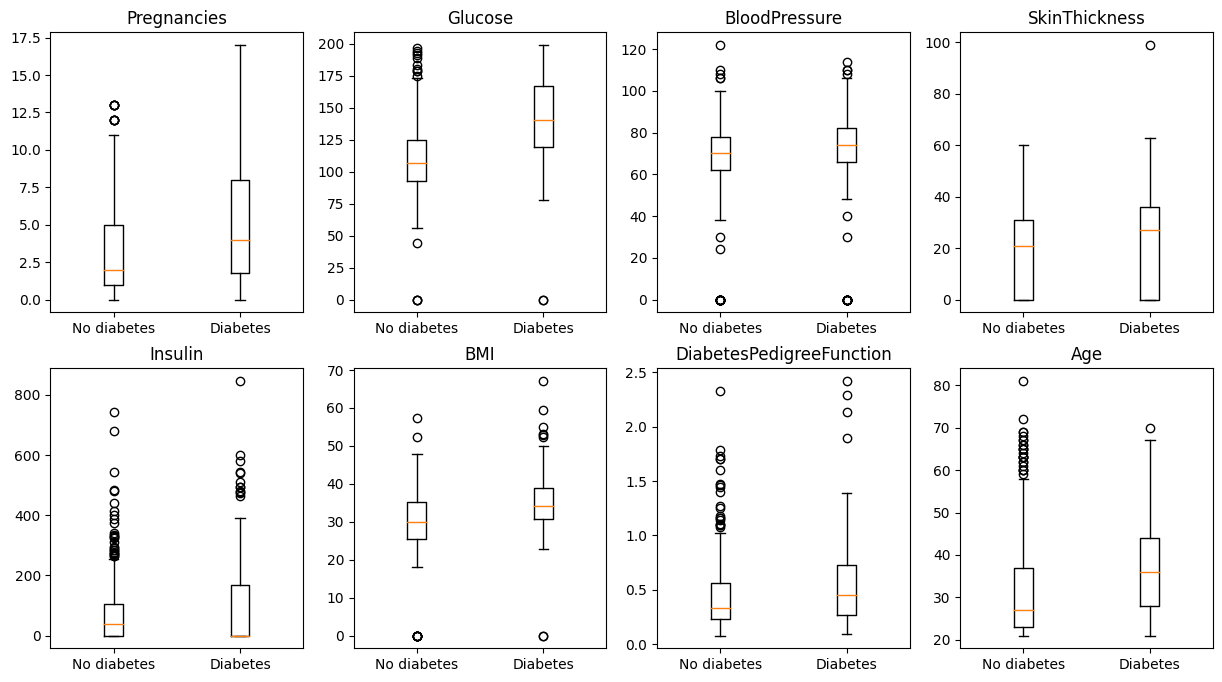

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8), sharey=False)
labels = ["No diabetes", "Diabetes"]

axs[0, 0].boxplot(outcomes_pregnancies, labels=labels)
axs[0, 0].set_title("Pregnancies")
axs[0, 1].boxplot(outcomes_glucose, labels=labels)
axs[0, 1].set_title("Glucose")
axs[0, 2].boxplot(outcomes_blood_pressure, labels=labels)
axs[0, 2].set_title("BloodPressure")
axs[0, 3].boxplot(outcomes_skin_thickness, labels=labels)
axs[0, 3].set_title("SkinThickness")
axs[1, 0].boxplot(outcomes_insulin, labels=labels)
axs[1, 0].set_title("Insulin")
axs[1, 1].boxplot(outcomes_bmi, labels=labels)
axs[1, 1].set_title("BMI")
axs[1, 2].boxplot(outcomes_dpf, labels=labels)
axs[1, 2].set_title("DiabetesPedigreeFunction")
axs[1, 3].boxplot(outcomes_age, labels=labels)
axs[1, 3].set_title("Age")

plt.show()

Exploring the results seen in the boxplots above we can tell that most of the variables have some relationship with the target variable:
* The higher number of pregnancies, the odds of being diagnosed with diabetes are higher
* The higher level of glucose, the odds of being diagnosed with diabetes are higher
* The higher level of insulin, the odds of being diagnosed with diabetes are higher
* The higher BMI, the odds of being diagnosed with diabetes are higher
* The higher level of Diabetes Pedigree Function, the odds of being diagnosed with diabetes are higher
* The higher age, the odds of being diagnosed with diabetes are higher (although there are a lot of exceptions and elder people with no diabetes)

Two of the features: BloodPressure and SkinThickness do not show visible relationship with the target variable base on the boxplot representation.

### Exploring the outliers

During the visual exploration of the histograms of the variables we could identify some variables with possible outliers problem, such as:
* Glucose
* SkinThickness
* Insulin
* BMI

To explore the matter further, the boxplots of the numerical variables are plotted below. We can see that the variable `Insulin` has a great amount of outliers that could potentially disrupt the functioning of the ML model - we want the model to generalize the data as much as possible and not to reproduce specific behaviour of outliers

/var/folders/88/frwn9j5n0bgb4gp7g2qbby7c0000gn/T/ipykernel_5437/3103933862.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


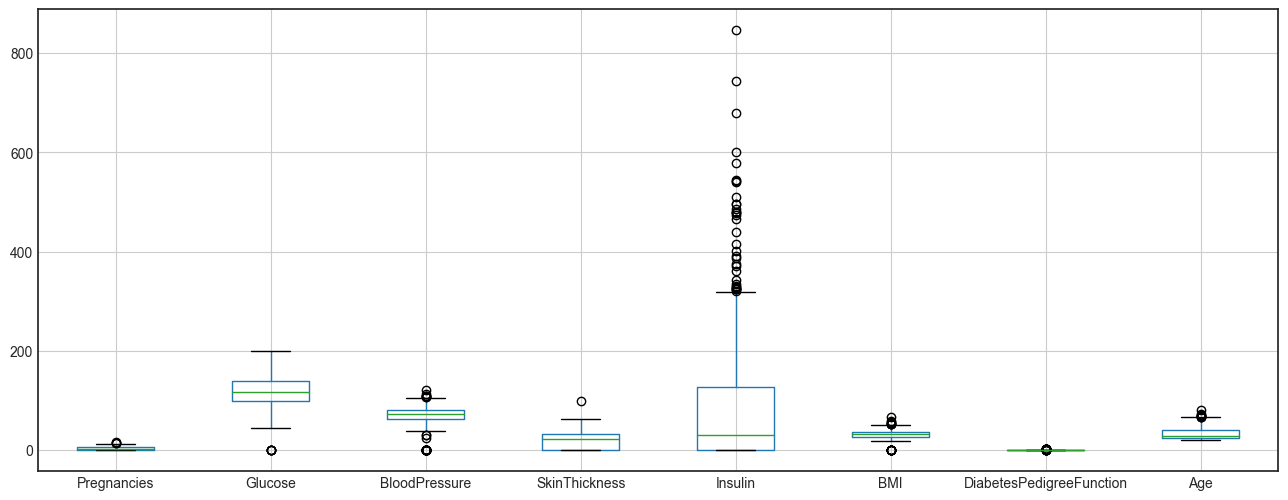

In [17]:
plt.style.use('seaborn-white')

data.boxplot(figsize = (16, 6))
plt.show()

We will take a closer look at the `Insulin` variable and get rid of the outlier values: the observations where the insulin value is greater or equal to 310 will be removed 

In [18]:
data[data['Insulin'] >= 310].shape[0]

36

We create a copy of the original data frame in order not to perform all the modifications to the original data

In [19]:
data_v1 = data[data['Insulin'] < 310]

In [20]:
data_v1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's perform the visual control of the outliers again - 36 observations containing outliers were removed - our data is now much cleaner

/var/folders/88/frwn9j5n0bgb4gp7g2qbby7c0000gn/T/ipykernel_5437/3006618046.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


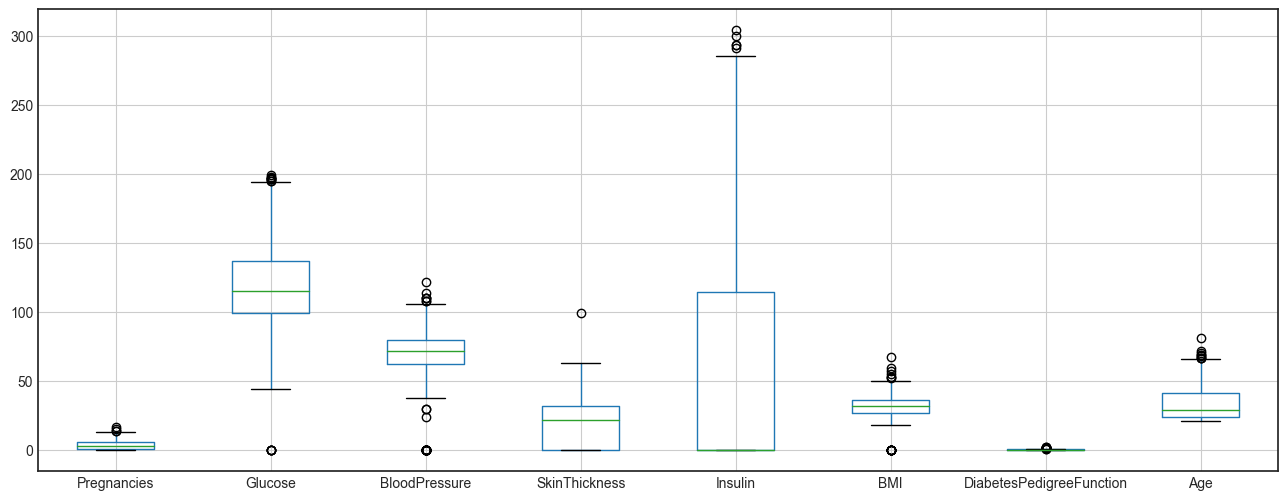

In [21]:
plt.style.use('seaborn-white')

data_v1.boxplot(figsize = (16, 6))
plt.show()

While analyzing the boxplot we can identify another anomaly in the data: level 0 of variables `Glucose`, `BloodPressurre` and `BMI`. After the verification of such levels with the medical data the observations with such levels will be also deleted - according to the expert knowledge it is impossible for a living person to have level 0 of the mentioned health indicators.

In [22]:
def delete_observations(data, *variables):
    for variable in variables:
        data = data[data[variable] != 0]
    return data

data_v1 = delete_observations(data_v1, 'Glucose', 'BloodPressure', 'BMI')

One more visual check

/var/folders/88/frwn9j5n0bgb4gp7g2qbby7c0000gn/T/ipykernel_5437/3006618046.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


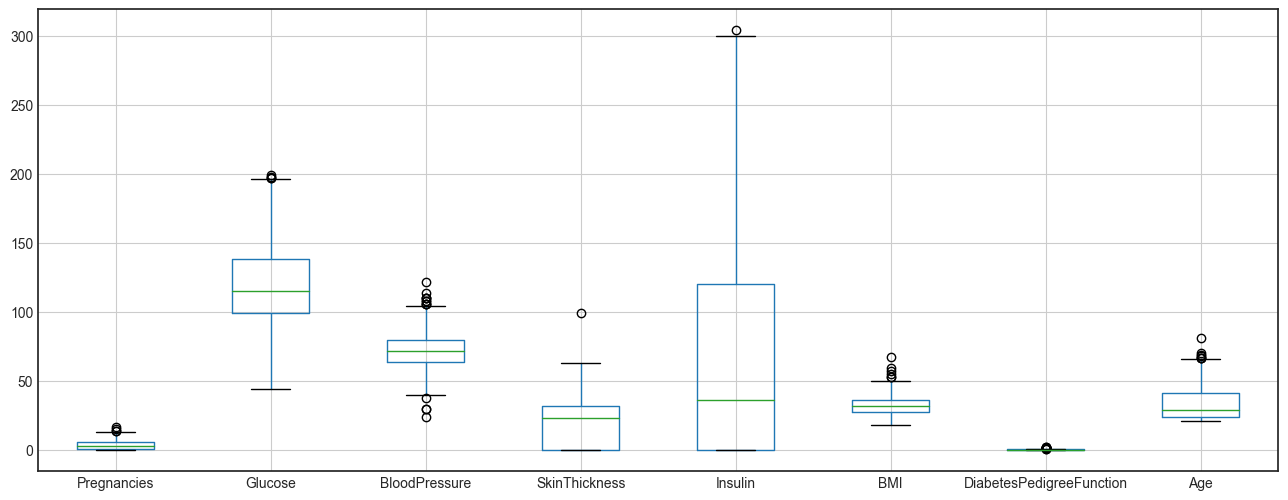

In [23]:
plt.style.use('seaborn-white')

data_v1.boxplot(figsize = (16, 6))
plt.show()

The distributions of the variables look good now. There are still some outliers, but due to the fact that they might bring some valuable information and patterns to the models, we will keep those observations. Furthermore, the correlations of the variables with the target variable are moderate, therefore there is a lower risk that the outliers will excesively influence the target.

## Preparing data for development of the ML models

Logistic regression is a model that assumes a linear relationship between the features and the target variable, therefore the right-skewness that we could see on some of the features' histograms might affect the model performance. Therefore we will create additional data set with some of the most crucial variables transformed, so that their distribution is as close to normal as possible

In [24]:
data_v2 = data_v1.copy()

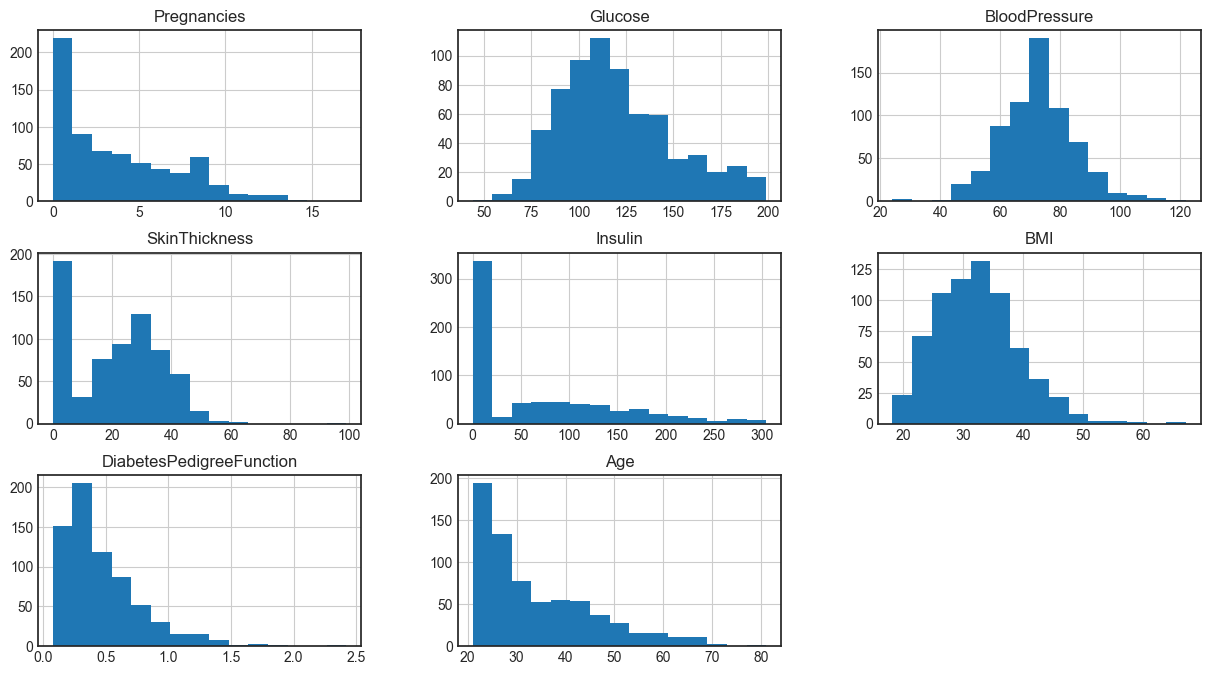

In [25]:
data_v2.hist(bins = 15, figsize=(15, 8))
plt.show()

### Bining variables to correct the distribution

Three features: `Age`, `BloodPressure` and `SkinThickness` will be binned into categorical variables. The selection of those features is based on the non-linear relationships between them and the target variable `Outcome` that we detected during the exploration of the boxplots. 

#### `Age`

In [26]:
age_list = np.array(data_v2['Age'])
print(np.quantile(age_list, [0, 0.25, 0.5, 0.75, 1]))

[21. 24. 29. 41. 81.]


In [27]:
data_v2['Age'] = pd.cut(data_v2['Age'], bins=[21, 24, 29, 41, 81], labels=['21-24', '25-29', '30-41', '42-81'], include_lowest=True)

Thanks to the bining of the `Age` variable according to the quartiles of the distribution we ensured that the quantity of observations in each category is similar

In [28]:
data_v2['Age'].value_counts()

Age
21-24    194
30-41    179
25-29    158
42-81    157
Name: count, dtype: int64

#### `BloodPressure`

In [29]:
blood_pressure_list = np.array(data_v2['BloodPressure'])
print(np.quantile(blood_pressure_list, [0, 0.25, 0.5, 0.75, 1]))

[ 24.  64.  72.  80. 122.]


In [30]:
data_v2['BloodPressure'] = pd.cut(data_v2['BloodPressure'], bins=[24, 64, 72, 80, 122], labels=['24-63', '64-71', '72-79', '80+'], include_lowest=True)

In [31]:
data_v2['BloodPressure'].value_counts()

BloodPressure
24-63    187
72-79    178
64-71    172
80+      151
Name: count, dtype: int64

#### `SkinThickness`

In [32]:
st_list = np.array(data_v2['SkinThickness'])
print(np.quantile(st_list, [0, 0.33, 0.66, 1]))

[ 0. 14. 30. 99.]


In [33]:
data_v2['SkinThickness'] = pd.cut(data_v2['SkinThickness'], bins=[0, 14, 30, 99], labels=['0-13', '14-29', '30+'], include_lowest=True)

In [34]:
data_v2['SkinThickness'].value_counts()

SkinThickness
14-29    245
0-13     228
30+      215
Name: count, dtype: int64

In order not to bin all variables, which is normally a bad practice in Machine Learning and can lead to the loss of some valuable information, we will leave other variables as they are

In [40]:
data_v2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,64-71,30+,0,33.6,0.627,42-81,1
1,1,85,64-71,14-29,0,26.6,0.351,30-41,0
2,8,183,24-63,0-13,0,23.3,0.672,30-41,1
3,1,89,64-71,14-29,94,28.1,0.167,21-24,0
4,0,137,24-63,30+,168,43.1,2.288,30-41,1


### Preprocess the data

#### data_v1 - without variables transformation

In [41]:
data_v1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               688 non-null    int64   
 1   Glucose                   688 non-null    int64   
 2   BloodPressure             688 non-null    int64   
 3   SkinThickness             688 non-null    int64   
 4   Insulin                   688 non-null    int64   
 5   BMI                       688 non-null    float64 
 6   DiabetesPedigreeFunction  688 non-null    float64 
 7   Age                       688 non-null    int64   
 8   Outcome                   688 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.2 KB


#### Splitting the target variable from the rest of variables

In [43]:
X_v1 = data_v1.drop(columns='Outcome', axis=1)
y_v1 = data_v1['Outcome']

In [44]:
X_v1_num = [column for column in X_v1.columns if X_v1[column].dtype == 'int64' or X_v1[column].dtype == 'float64']
X_v1_num

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#### Standard scaling of the numerical variables

In [45]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_v1[X_v1_num] = standard_scaler.fit_transform(X_v1[X_v1_num])

In [46]:
X_v1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631291,0.933571,-0.035710,0.895083,-0.828343,0.184413,0.490387,1.423551
1,-0.849037,-1.169693,-0.520611,0.514479,-0.828343,-0.832570,-0.367414,-0.197977
2,1.223423,2.102050,-0.682245,-1.325107,-0.828343,-1.312005,0.630246,-0.112634
3,-0.849037,-1.036152,-0.520611,0.133875,0.361877,-0.614645,-0.939281,-1.051414
4,-1.145103,0.566334,-2.621852,0.895083,1.298858,1.564604,5.652733,-0.027290


In [47]:
y_v1 = y_v1.astype('int')

In [48]:
y_v1[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### data_v2 - with variables transformation

In [49]:
data_v2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,64-71,30+,0,33.6,0.627,42-81,1
1,1,85,64-71,14-29,0,26.6,0.351,30-41,0
2,8,183,24-63,0-13,0,23.3,0.672,30-41,1
3,1,89,64-71,14-29,94,28.1,0.167,21-24,0
4,0,137,24-63,30+,168,43.1,2.288,30-41,1


In [50]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               688 non-null    int64   
 1   Glucose                   688 non-null    int64   
 2   BloodPressure             688 non-null    category
 3   SkinThickness             688 non-null    category
 4   Insulin                   688 non-null    int64   
 5   BMI                       688 non-null    float64 
 6   DiabetesPedigreeFunction  688 non-null    float64 
 7   Age                       688 non-null    category
 8   Outcome                   688 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 35.6 KB


#### Splitting the target variable from other variables

In [51]:
X_v2 = data_v2.drop(columns='Outcome', axis=1)
y_v2 = data_v2['Outcome']

In [52]:
X_v2_num = [column for column in X_v2.columns if X_v2[column].dtype == 'int64' or X_v2[column].dtype == 'float64']
X_v2_num

['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

In [53]:
X_v2_cat = [column for column in X_v2.columns if X_v2[column].dtype == 'category' or X_v2[column].dtype == 'object']
X_v2_cat

['BloodPressure', 'SkinThickness', 'Age']

#### Standard scaling of the numerical variables

In [54]:
X_v2[X_v2_num] = standard_scaler.fit_transform(X_v2[X_v2_num])
X_v2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631291,0.933571,64-71,30+,-0.828343,0.184413,0.490387,42-81
1,-0.849037,-1.169693,64-71,14-29,-0.828343,-0.832570,-0.367414,30-41
2,1.223423,2.102050,24-63,0-13,-0.828343,-1.312005,0.630246,30-41
3,-0.849037,-1.036152,64-71,14-29,0.361877,-0.614645,-0.939281,21-24
4,-1.145103,0.566334,24-63,30+,1.298858,1.564604,5.652733,30-41


#### One-hot-encoding on the categorical variables

In [55]:
def one_hot_encoding_custom(data, columns):
    data = pd.get_dummies(data, columns=columns, drop_first=False)
    
    return data

X_v2 = one_hot_encoding_custom(X_v2, X_v2_cat)
X_v2.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,BloodPressure_24-63,BloodPressure_64-71,BloodPressure_72-79,BloodPressure_80+,SkinThickness_0-13,SkinThickness_14-29,SkinThickness_30+,Age_21-24,Age_25-29,Age_30-41,Age_42-81
0,0.631291,0.933571,-0.828343,0.184413,0.490387,False,True,False,False,False,False,True,False,False,False,True
1,-0.849037,-1.169693,-0.828343,-0.832570,-0.367414,False,True,False,False,False,True,False,False,False,True,False
2,1.223423,2.102050,-0.828343,-1.312005,0.630246,True,False,False,False,True,False,False,False,False,True,False
3,-0.849037,-1.036152,0.361877,-0.614645,-0.939281,False,True,False,False,False,True,False,True,False,False,False
4,-1.145103,0.566334,1.298858,1.564604,5.652733,True,False,False,False,False,False,True,False,False,True,False


In [56]:
y_v2 = y_v2.astype('int')
y_v2[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### Automating the preprocessing of data

In [11]:
def data_preprocessing(data):
    # Standardize numerical features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    data_num = [column for column in data.columns if data[column].dtype == 'int64' or data[column].dtype == 'float64']
    data[data_num] = scaler.fit_transform(data[data_num])
    
    # One-hot encode categorical features
    data_cat = [column for column in data.columns if data[column].dtype == 'category' or data[column].dtype == 'object']
    data = pd.get_dummies(data, columns=data_cat, drop_first=False)
    
    return data
    

#### Splitting the data into training, validation and test data

Since our data set contains a small number of observations we will perform the division into training, validation and test sets with following proportions:
* training set: 80%
* validation set: 10%
* test set: 10%

In [58]:
from sklearn.model_selection import train_test_split

X_v1_train, X_v1_val_test, y_v1_train, y_v1_val_test = train_test_split(X_v1, y_v1, test_size=0.2, random_state=10)
X_v1_val, X_v1_test, y_v1_val, y_v1_test = train_test_split(X_v1_val_test, y_v1_val_test, test_size=0.5, random_state=10)

Check the size of the data sets

In [59]:
print(data_v1.shape)

print(X_v1_train.shape)
print(y_v1_train.shape)

print(X_v1_val.shape)
print(y_v1_val.shape)

print(X_v1_test.shape)
print(y_v1_test.shape)

(688, 9)
(550, 8)
(550,)
(69, 8)
(69,)
(69, 8)
(69,)


Check the distribution of the data

In [60]:
X_v1_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,550.0,0.013321,1.012110,-1.145103,-0.849037,-0.256906,0.631291,3.888014
Glucose,550.0,-0.003398,1.008589,-2.538483,-0.702301,-0.168139,0.591373,2.569442
BloodPressure,550.0,0.013221,1.014138,-3.914923,-0.682245,-0.035710,0.610826,4.005137
SkinThickness,550.0,-0.004642,1.003054,-1.325107,-1.325107,0.133875,0.704781,4.954859
Insulin,550.0,-0.018902,0.988422,-0.828343,-0.828343,-0.486471,0.627777,3.020878
BMI,550.0,-0.021044,0.984777,-2.052950,-0.730872,-0.048041,0.547621,3.932721
DiabetesPedigreeFunction,550.0,0.024841,1.019315,-1.215891,-0.689866,-0.252419,0.521467,6.062986
Age,550.0,0.043933,1.024939,-1.051414,-0.795383,-0.283321,0.655459,4.069204


In [61]:
X_v1_val.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,69.0,-0.033784,0.934044,-1.145103,-0.849037,-0.256906,0.631291,2.703751
Glucose,69.0,-0.082983,0.951012,-1.637085,-0.702301,-0.301679,0.499564,2.636212
BloodPressure,69.0,-0.196172,0.875760,-2.298584,-0.843879,-0.197344,0.287558,2.065530
SkinThickness,69.0,0.129279,0.947291,-1.325107,-0.373597,0.133875,0.704781,1.973461
Insulin,69.0,0.130109,0.975736,-0.828343,-0.828343,-0.005319,0.843029,2.337134
BMI,69.0,-0.113313,0.881246,-2.052950,-0.890684,-0.207852,0.460451,2.000454
DiabetesPedigreeFunction,69.0,-0.043869,0.937479,-1.147516,-0.678212,-0.295931,0.272829,3.819028
Age,69.0,-0.169529,0.851258,-1.051414,-0.880726,-0.368665,0.228741,2.533018


In [62]:
X_v1_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,69.0,-0.072401,0.983384,-1.145103,-0.849037,-0.256906,0.335226,2.703751
Glucose,69.0,0.110071,0.990473,-1.303233,-0.602145,-0.168139,0.800030,2.602827
BloodPressure,69.0,0.090786,0.999216,-1.813682,-0.682245,-0.035710,0.772460,3.035334
SkinThickness,69.0,-0.092281,1.035176,-1.325107,-1.325107,-0.183295,0.895083,2.100329
Insulin,69.0,0.020556,1.121353,-0.828343,-0.828343,-0.828343,0.691086,2.767639
BMI,69.0,0.281058,1.189406,-1.646157,-0.600117,0.242526,0.881772,5.051403
DiabetesPedigreeFunction,69.0,-0.154135,0.905158,-1.100896,-0.783883,-0.479301,0.176481,2.526110
Age,69.0,-0.180661,0.913167,-1.051414,-0.795383,-0.454008,0.314084,3.130424


In [63]:
X_v2_train, X_v2_val_test, y_v2_train, y_v2_val_test = train_test_split(X_v2, y_v2, test_size=0.2, random_state=10)
X_v2_val, X_v2_test, y_v2_val, y_v2_test = train_test_split(X_v2_val_test, y_v2_val_test, test_size=0.5, random_state=10)

What's the percentage of the patients with diabetes in all three data sets? (Data set version after transformation)

In [65]:
print(f"Training data: {round(y_v2_train.value_counts()[1] / (y_v2_train.value_counts()[0] + y_v2_train.value_counts()[1]), 2) * 100}%")
print(f"Validation data: {round(y_v2_val.value_counts()[1] / (y_v2_val.value_counts()[0] + y_v2_val.value_counts()[1]), 2) * 100}%")
print(f"Test data: {round(y_v2_test.value_counts()[1] / (y_v2_test.value_counts()[0] + y_v2_test.value_counts()[1]), 2) * 100}%")

Training data: 34.0%
Validation data: 32.0%
Test data: 30.0%


## Training the models

#### Logistic regression 

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg_v1 = LogisticRegression()
log_reg_v1.fit(X_v1_train, y_v1_train)

LogisticRegression()

In [67]:
log_reg_v2 = LogisticRegression()
log_reg_v2.fit(X_v2_train, y_v2_train)

LogisticRegression()

#### Investigating the coefficients and the odds ratio of two log_reg models

In [68]:
log_reg_v1.coef_

array([[ 0.36372332,  1.15900022, -0.07383481, -0.06754966, -0.10095523,
         0.72782936,  0.34183728,  0.10764301]])

In [69]:
log_reg_v1.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [70]:
odds_ratio_v1 = np.exp(log_reg_v1.coef_)
odds_ratio_v1

array([[1.43867611, 3.18674564, 0.92882511, 0.9346813 , 0.9039735 ,
        2.07058124, 1.40753125, 1.11365012]])

The interpretation of the most prominent odds ratio of the log_reg_v1:
* An increase in the number of pregnancies increases the odds of diabetes vs. no diabetes by a factor of 1.43, when all other features remain the same
* An increase in the level of glucose increases the odds of diabetes vs. no diabetes by a factor of 3.18, when all other features remain the same
* An increase in the level of BMI increases the odds of diabetes vs. no diabetes by a factor of 2.07, when all other features remain the same

In [71]:
log_reg_v1_results = pd.DataFrame(list(zip(log_reg_v1.feature_names_in_, log_reg_v1.coef_.flatten(), odds_ratio_v1.flatten())), columns=['Feature', 'Coefficient', 'Odds ratio'])
log_reg_v1_results

,Feature,Coefficient,Odds ratio
0,Pregnancies,0.363723,1.438676
1,Glucose,1.159000,3.186746
2,BloodPressure,-0.073835,0.928825
3,SkinThickness,-0.067550,0.934681
4,Insulin,-0.100955,0.903974
5,BMI,0.727829,2.070581
6,DiabetesPedigreeFunction,0.341837,1.407531
7,Age,0.107643,1.113650


In [72]:
odds_ratio_v2 = np.exp(log_reg_v2.coef_)

An interpretation of the most prominent odds ratio of the log_reg_v2:
* An increase in the level of glucose increases the odds of diabetes vs. no diabetes by a factor of 3.10, when all other features remain the same
* An increase in the level of BMI to the power of 0.05 increases the odds of diabetes vs. no diabetes by a factor of 2.13, when all othe features remain the same
* For people of age between 42-81 years old, the odds for diabetes vs. no diabetes are by a factor of 1.67 higher compared to people in other age groups, given all other features stay the same

In [73]:
log_reg_v2_results = pd.DataFrame(list(zip(log_reg_v2.feature_names_in_, log_reg_v2.coef_.flatten(), odds_ratio_v2.flatten())), columns=['Feature', 'Coefficient', 'Odds ratio'])
log_reg_v2_results

,Feature,Coefficient,Odds ratio
0,Pregnancies,0.186210,1.204676
1,Glucose,1.146793,3.148081
2,Insulin,-0.132474,0.875926
3,BMI,0.713281,2.040676
4,DiabetesPedigreeFunction,0.324561,1.383423
5,BloodPressure_24-63,0.130494,1.139391
6,BloodPressure_64-71,0.219812,1.245842
7,BloodPressure_72-79,-0.145261,0.864796
8,BloodPressure_80+,-0.205032,0.814621
9,SkinThickness_0-13,0.021758,1.021996


Summing up two logistic regression models trained on the same dataset that has been put through different approaches to transformation of the variables, we can generalize that:
* higher levels of glucose are the main determinant of the possible diabetes diagnosis - higher glucose levels increase the odds of diabetes the most out of all features (given that all other features remain the same)
* BMI level, meaning the weight of a person, is the second most important determinant of a diabetes - the higher body mass and thus the BMI level, the greater odds of being diagnosed with diabetes
* generally, elder people are more prone to being diagnosed with diabetes than younger people

#### K-Nearest Neighbors

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn_v1 = KNeighborsClassifier()
knn_v1.fit(X_v1_train, y_v1_train)

KNeighborsClassifier()

In [75]:
knn_v2 = KNeighborsClassifier()
knn_v2.fit(X_v2_train, y_v2_train)

KNeighborsClassifier()

#### Decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

dt_v1 = DecisionTreeClassifier()
dt_v1.fit(X_v1_train, y_v1_train)

DecisionTreeClassifier()

In [77]:
dt_v2 = DecisionTreeClassifier()
dt_v2.fit(X_v2_train, y_v2_train)

DecisionTreeClassifier()

Both decision tree models are deep and thus over-complicated which means that we encounter a problem of over-fitting

In [78]:
print(f"The depth of the first decision tree model is: {dt_v1.tree_.max_depth}")
print(f"The depth of the second decision tree model is: {dt_v2.tree_.max_depth}")

The depth of the first decision tree model is: 16
The depth of the second decision tree model is: 18


#### The graph of a first decicion tree

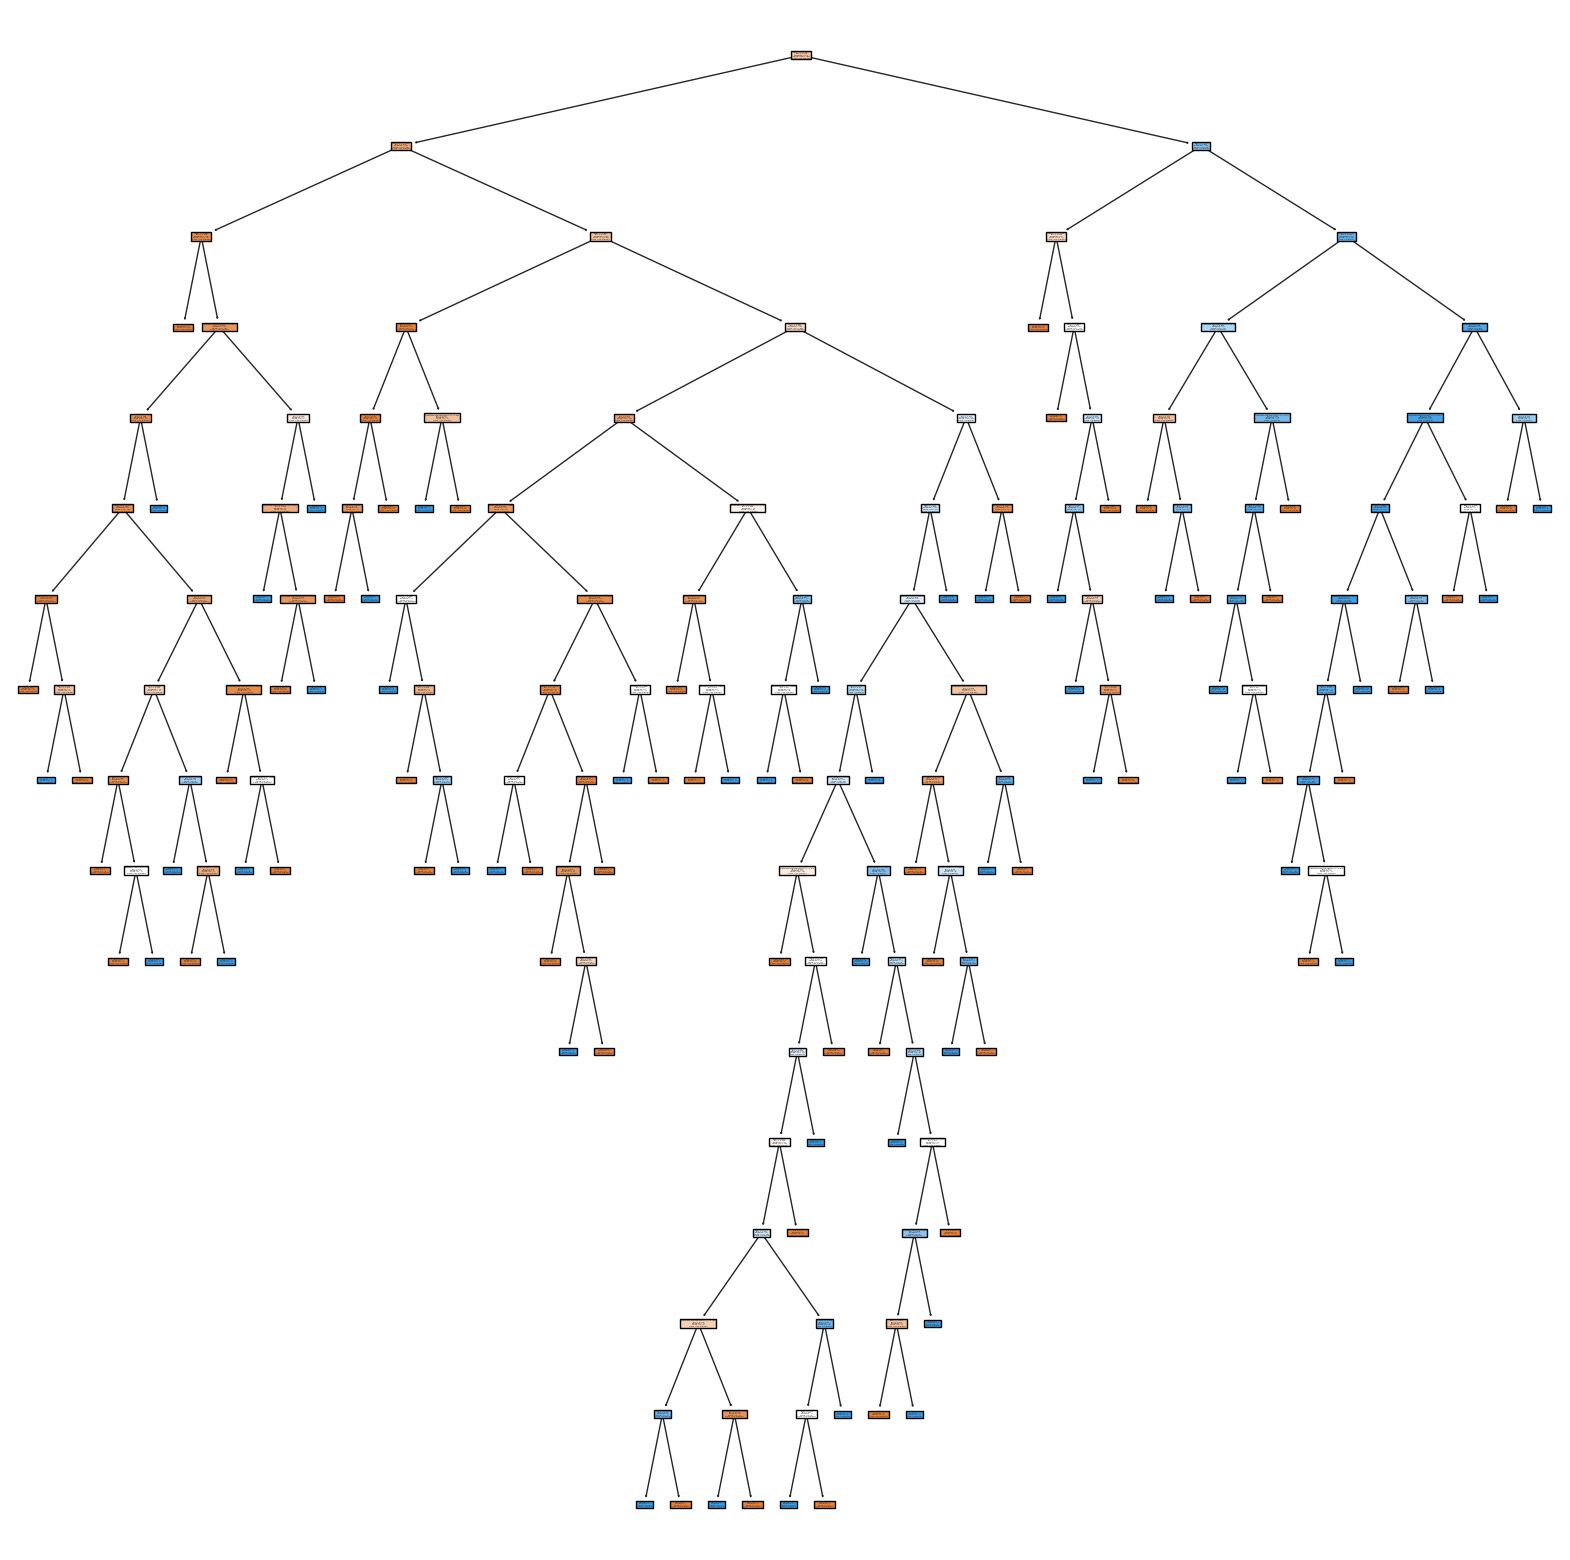

In [79]:
from sklearn import tree

fig1 = plt.figure(figsize=(20,20))
plot_dt_v1 = tree.plot_tree(dt_v1, filled=True, feature_names=list(X_v1.columns), class_names=['No diabetes', 'Diabetes'])

#### Random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf_v1 = RandomForestClassifier()
rf_v1.fit(X_v1_train, y_v1_train)

RandomForestClassifier()

In [81]:
rf_v2 = RandomForestClassifier()
rf_v2.fit(X_v2_train, y_v2_train)

RandomForestClassifier()

Depth of the first 10 decision trees in random forest 1

In [82]:
for i in range(10):
    print(rf_v1.estimators_[i].tree_.max_depth)

13
13
14
14
14
16
16
12
19
12


Depth of the first 10 decision trees in random forest 2

In [83]:
for i in range(10):
    print(rf_v2.estimators_[i].tree_.max_depth)

18
16
12
15
15
17
14
12
14
16


#### Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

gb_v1 = GradientBoostingClassifier()
gb_v1.fit(X_v1_train, y_v1_train)

GradientBoostingClassifier()

In [85]:
gb_v2 = GradientBoostingClassifier()
gb_v2.fit(X_v2_train, y_v2_train)

GradientBoostingClassifier()

#### XGBoost

In [86]:
from xgboost import XGBClassifier

xgb_v1 = XGBClassifier()
xgb_v1.fit(X_v1_train, y_v1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
xgb_v2 = XGBClassifier()
xgb_v2.fit(X_v2_train, y_v2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Models evaluation

First we will take a look at all the models built for dataset 1 and dataset 2 and their metrics: Accuracy, Precision, Recall & AUC

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def model_evaluation(model, X_val, y_val):
    if model == knn_v2:
        X_val = X_val.values
    else:
        X_val = X_val
        
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    return [accuracy, precision, recall, roc_auc]

log_reg_v1_scores = model_evaluation(log_reg_v1, X_v1_val, y_v1_val)
knn_v1_scores = model_evaluation(knn_v1, X_v1_val, y_v1_val)
dt_v1_scores = model_evaluation(dt_v1, X_v1_val, y_v1_val)
rf_v1_scores = model_evaluation(rf_v1, X_v1_val, y_v1_val)
gb_v1_scores = model_evaluation(gb_v1, X_v1_val, y_v1_val)
xgb_v1_scores = model_evaluation(xgb_v1, X_v1_val, y_v1_val)

In [89]:
models_v1_metrics = pd.DataFrame(list(zip(log_reg_v1_scores,
                                       knn_v1_scores,
                                       dt_v1_scores,
                                       rf_v1_scores,
                                       gb_v1_scores,
                                       xgb_v1_scores)),
                              columns=['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Ada Boost', 'XGBoost'],
                              index=['Accuracy', 'Precision', 'Recall', 'AUC'])

In [90]:
models_v1_metrics.T

,Accuracy,Precision,Recall,AUC
Logistic Regression,0.768116,0.714286,0.454545,0.847195
K Nearest Neighbors,0.782609,0.733333,0.500000,0.774662
Decision Tree,0.724638,0.565217,0.590909,0.689072
Random Forest,0.826087,0.777778,0.636364,0.842843
Ada Boost,0.724638,0.600000,0.409091,0.772727
XGBoost,0.724638,0.578947,0.500000,0.748549


In [93]:
log_reg_v2_scores = model_evaluation(log_reg_v2, X_v2_val, y_v2_val)
knn_v2_scores = model_evaluation(knn_v2, X_v2_val, y_v2_val)
dt_v2_scores = model_evaluation(dt_v2, X_v2_val, y_v2_val)
rf_v2_scores = model_evaluation(rf_v2, X_v2_val, y_v2_val)
gb_v2_scores = model_evaluation(gb_v2, X_v2_val, y_v2_val)
xgb_v2_scores = model_evaluation(xgb_v2, X_v2_val, y_v2_val)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [94]:
log_reg_v2_scores

[0.7971014492753623, 0.7857142857142857, 0.5, 0.849129593810445]

In [95]:
models_v2_metrics = pd.DataFrame(list(zip(log_reg_v2_scores,
                                       knn_v2_scores,
                                       dt_v2_scores,
                                       rf_v2_scores,
                                       gb_v2_scores,
                                       xgb_v2_scores)),
                              columns=['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Ada Boost', 'XGBoost'],
                              index=['Accuracy', 'Precision', 'Recall', 'AUC'])

In [96]:
models_v2_metrics.T

,Accuracy,Precision,Recall,AUC
Logistic Regression,0.797101,0.785714,0.500000,0.849130
K Nearest Neighbors,0.724638,0.615385,0.363636,0.754836
Decision Tree,0.695652,0.520000,0.590909,0.667795
Random Forest,0.782609,0.666667,0.636364,0.862186
Ada Boost,0.695652,0.529412,0.409091,0.786267
XGBoost,0.782609,0.640000,0.727273,0.797872


In [97]:
models_v1_metrics.T

,Accuracy,Precision,Recall,AUC
Logistic Regression,0.768116,0.714286,0.454545,0.847195
K Nearest Neighbors,0.782609,0.733333,0.500000,0.774662
Decision Tree,0.724638,0.565217,0.590909,0.689072
Random Forest,0.826087,0.777778,0.636364,0.842843
Ada Boost,0.724638,0.600000,0.409091,0.772727
XGBoost,0.724638,0.578947,0.500000,0.748549


Models built on two datasets - one without variables transformation and one after variables transformation give different metric results. Generally speaking the majority of metrics in logistic regression are higher thanks to the binning of the numerical variables, while in other models the metrics are lower. This is because the models such as k-NN, neural networks and those based on the decision trees are the models that perform the best on raw data. Logistic regression, on the other hand, performs well if the assumtions about the linear relationships between the features and the target variable are met - we can achieve this by binning the numerical variables, applying logarythmic transformation or raising the variable to the power between 0 and 1. Such transformations however, can lead to the loss of some valuable information in data and complicate the interpretation of the results. Because of the forementioned arguments, we will focus on the further evaluation of the models and hyperparamether tuning for the models build on scaled and one-hot-encoded raw data.

Because of the better metrics for the logisctic regression model based on the transformed variables, however, we will assume the coefficients and the odds ratios of the `log_reg_v2` model are more appropriate

### Hyperparamether tuning

#### k-NN - Grid searching

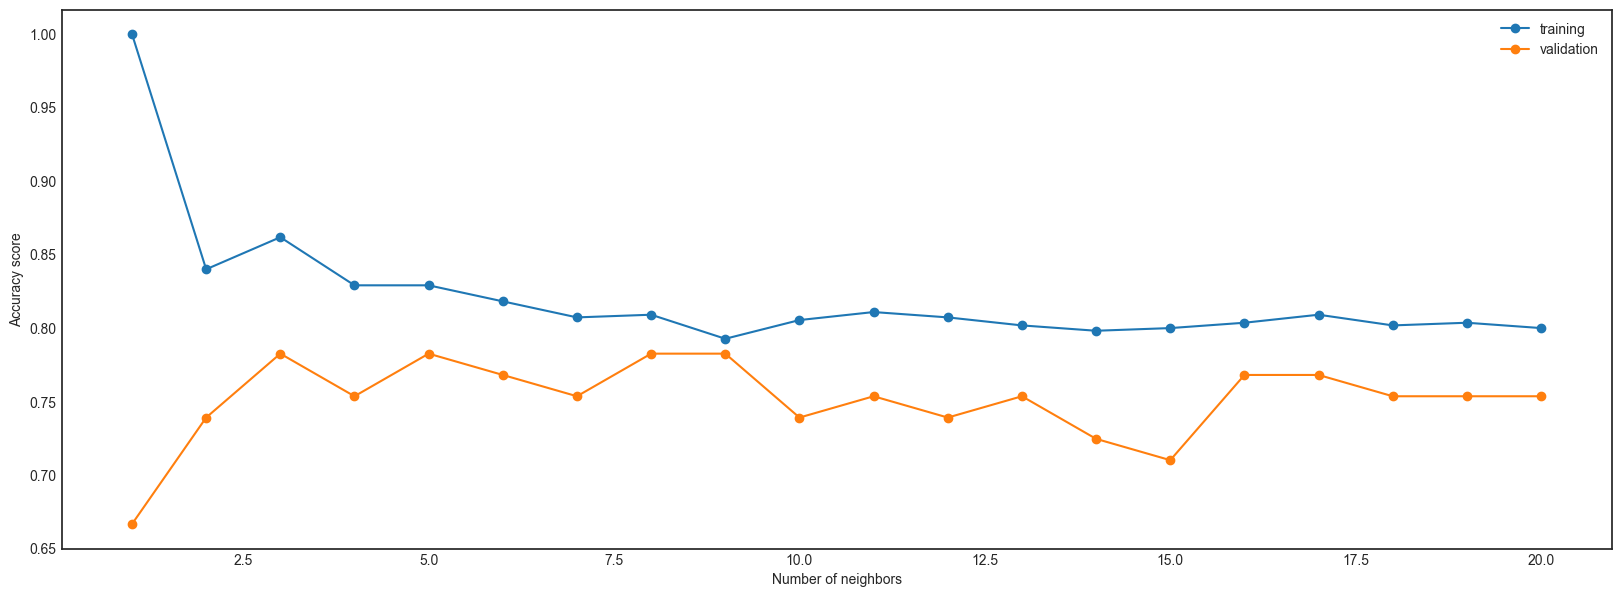

In [100]:
k_range = range(1, 21)

fig = plt.figure(figsize=(20,7))

acc_train = [accuracy_score(y_pred = (KNeighborsClassifier(n_neighbors=k).fit(X_v1_train.values, y_v1_train.values).predict(X_v1_train.values)),
                            y_true = y_v1_train) for k in k_range]

acc_val = [accuracy_score(y_pred = (KNeighborsClassifier(n_neighbors=k).fit(X_v1_train.values, y_v1_train.values).predict(X_v1_val.values)),
                          y_true = y_v1_val) for k in k_range]

plt.plot(k_range, acc_train, label='training', marker = 'o')
plt.plot(k_range, acc_val, label='validation', marker = 'o')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy score')
plt.legend()

In [101]:
from sklearn.model_selection import GridSearchCV

n_neighbors = [3, 5, 8]
weights = ['uniform', 'distance']

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator=knn,
                        param_grid={'n_neighbors': n_neighbors,
                                    'weights': weights},
                        cv=10,
                        scoring='accuracy',
                        n_jobs=-1)

knn_grid.fit(X_v1_train.values, y_v1_train.values)
knn_grid.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [104]:
best_knn_grid = KNeighborsClassifier(n_neighbors=5, weights='uniform')
best_knn_grid.fit(X_v1_train, y_v1_train)

KNeighborsClassifier()

In [105]:
knn_v1_scores = model_evaluation(knn_v1, X_v1_val, y_v1_val)
best_knn_grid_scores = model_evaluation(best_knn_grid, X_v1_val, y_v1_val)

The default k-NN model was also the best performing k-NN model

In [125]:
knn_metrics = pd.DataFrame(list(zip(knn_v1_scores, best_knn_grid_scores)),
                              columns=['K Nearest Neighbors v1', 'K Nearest Neighbors Grid Search'],
                              index=['Accuracy', 'Precision', 'Recall', 'AUC'])
knn_metrics

,K Nearest Neighbors v1,K Nearest Neighbors Grid Search
Accuracy,0.782609,0.782609
Precision,0.733333,0.733333
Recall,0.500000,0.500000
AUC,0.774662,0.774662


#### Decision tree - cost complexity pruning

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html 

Cost complexity pruning provides another option to control the size of a tree, instead of relying on the hyperparameters `min_samples_leaf` and `max_depth`. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of ccp_alpha increase the number of nodes pruned.

In [115]:
path = dt_v1.cost_complexity_pruning_path(X_v1_train, y_v1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

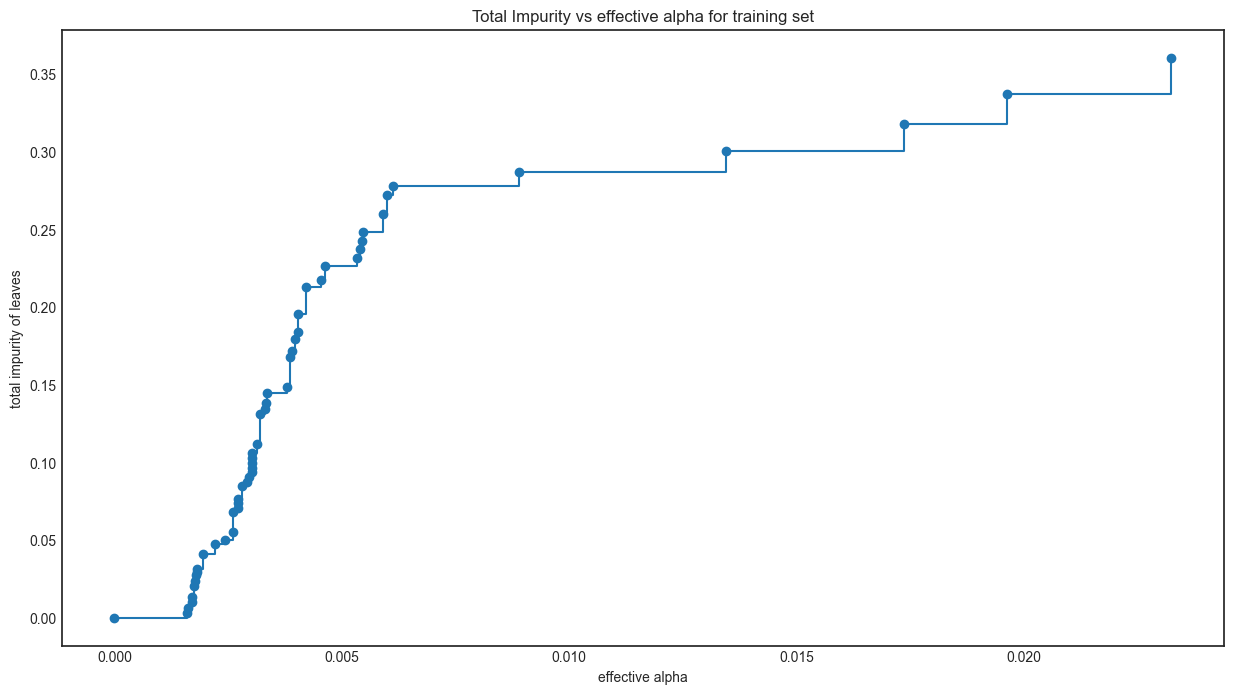

In [117]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [118]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_v1_train, y_v1_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.0871505413543468


An illustration showing how the number of nodes and the depth of the tree decrease as alpha increases - in our model we see a very rapid decrease of nodes and depth as the alpha grows till the level of 0.005

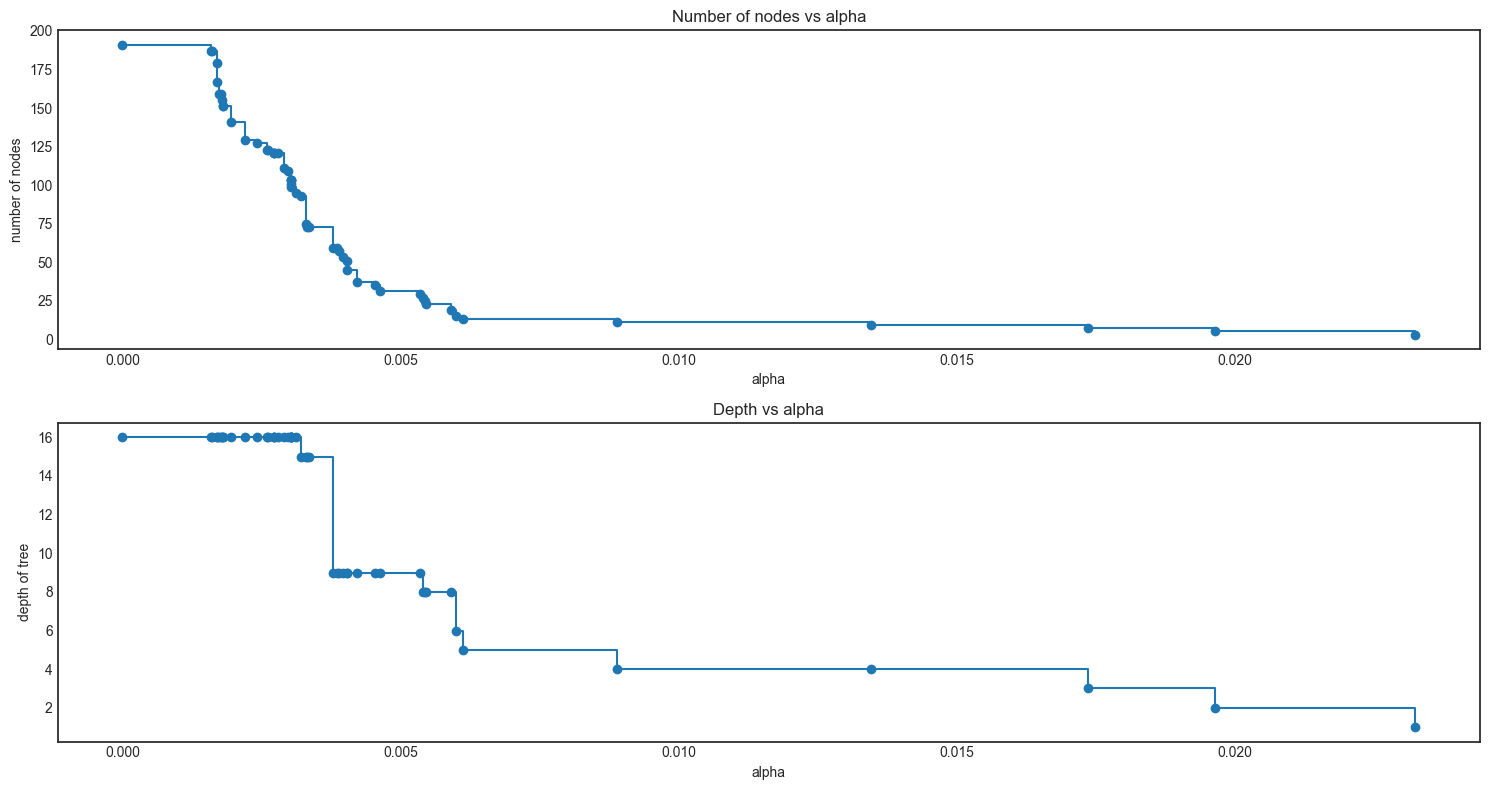

In [119]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Due to the small validation dataset random chance leads to higher accuracy than on the training data

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.02 maximizes the validation accuracy. 

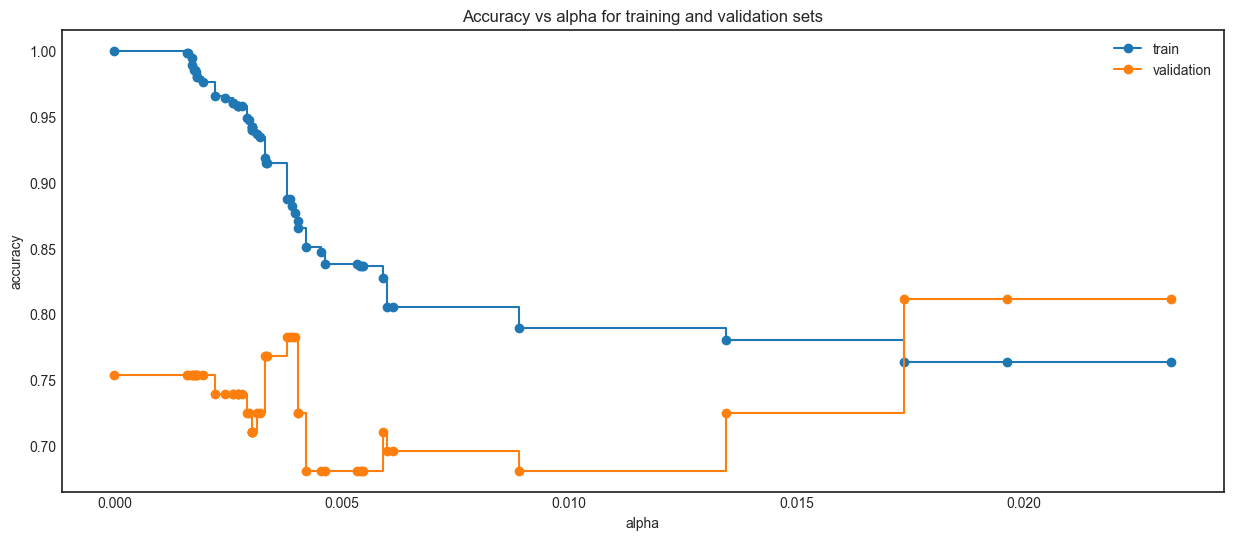

In [126]:
train_scores = [clf.score(X_v1_train, y_v1_train) for clf in clfs]
val_scores = [clf.score(X_v1_val, y_v1_val) for clf in clfs]

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

In [121]:
dt_best_alpha = DecisionTreeClassifier(ccp_alpha=0.02)
dt_best_alpha.fit(X_v1_train, y_v1_train)

DecisionTreeClassifier(ccp_alpha=0.02)

In [122]:
dt_v1_scores = model_evaluation(dt_v1, X_v1_val, y_v1_val)
dt_best_alpha_scores = model_evaluation(dt_best_alpha, X_v1_val, y_v1_val)

In [124]:
dt_metrics = pd.DataFrame(list(zip(dt_v1_scores, dt_best_alpha_scores)),
                              columns=['Decision tree v1', 'Decision tree alpha = 0.02'],
                              index=['Accuracy', 'Precision', 'Recall', 'AUC'])
dt_metrics

,Decision tree v1,Decision tree alpha = 0.02
Accuracy,0.724638,0.811594
Precision,0.565217,0.846154
Recall,0.590909,0.500000
AUC,0.689072,0.775145


In [127]:
dt_best_alpha.get_depth()

2

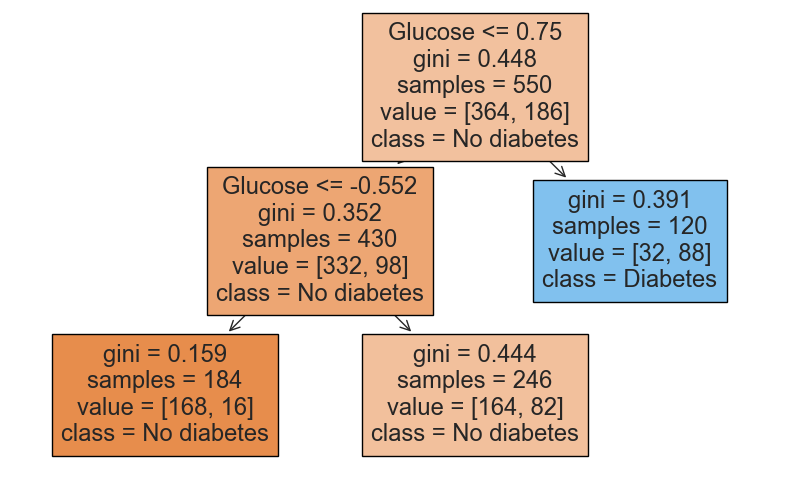

In [130]:
fig = plt.figure(figsize=(10,6))
plot_dt_best_alpha = tree.plot_tree(dt_best_alpha, filled=True, feature_names=list(X_v1.columns), class_names=['No diabetes', 'Diabetes'])

#### Random forest - Grid search

In [148]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 3, 5, 7]
max_features = ['sqrt', 'log2']

In [149]:
rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=rf,
                       param_grid={'n_estimators': n_estimators,
                                   'max_depth': max_depth,
                                   'max_features': max_features},
                       cv=10,
                       scoring='accuracy',
                       n_jobs=-1)

rf_grid.fit(X_v1_train, y_v1_train)
rf_grid.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}

In [150]:
rf_best_grid = RandomForestClassifier(n_estimators=100, max_depth=7, max_features='sqrt')
rf_best_grid.fit(X_v1_train, y_v1_train)

RandomForestClassifier(max_depth=7)

The random forest model with the best parameters selected by the grid search has almost the same metrics as the first random forest model we created, the only difference being the higher AUC score

In [151]:
rf_best_grid_scores = model_evaluation(rf_best_grid, X_v1_val, y_v1_val)

rf_metrics = pd.DataFrame(list(zip(rf_v1_scores, rf_best_grid_scores)),
                          columns=['Random Forest v1', 'Random Forest Grid Search'],
                          index=['Accuracy', 'Precision', 'Recall', 'AUC'])
rf_metrics

,Random Forest v1,Random Forest Grid Search
Accuracy,0.826087,0.826087
Precision,0.777778,0.777778
Recall,0.636364,0.636364
AUC,0.842843,0.863636


#### Gradient boosting classifier - grid search

In [152]:
loss = ['log_loss', 'exponential']
learning_rate = [0.01, 0.05, 0.1, 0.5]
n_estimators = [50, 100, 150, 200]
subsample = [0.5, 0.7, 1]
max_features = ['sqrt', 'log2', None]
warm_start = [True, False]

In [153]:
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator=gb,
                            param_grid={'loss': loss,
                                        'learning_rate': learning_rate,
                                        'n_estimators': n_estimators,
                                        'subsample': subsample,
                                        'max_features': max_features,
                                        'warm_start': warm_start},
                            cv=10,
                            scoring='accuracy',
                            n_jobs=-1)

gb_grid.fit(X_v1_train, y_v1_train)
gb_grid.best_params_

{'learning_rate': 0.05,
 'loss': 'exponential',
 'max_features': 'sqrt',
 'n_estimators': 150,
 'subsample': 0.7,
 'warm_start': False}

In [154]:
gb_best_grid = GradientBoostingClassifier(learning_rate=0.05, 
                                          loss='exponential', 
                                          max_features='sqrt', 
                                          n_estimators=150, 
                                          subsample=0.7, 
                                          warm_start=False)

gb_best_grid.fit(X_v1_train, y_v1_train)

GradientBoostingClassifier(learning_rate=0.05, loss='exponential',
                           max_features='sqrt', n_estimators=150,
                           subsample=0.7)

All metrics improved thanks to the grid search

In [156]:
gb_best_grid_scores = model_evaluation(gb_best_grid, X_v1_val, y_v1_val)

gb_metrics = pd.DataFrame(list(zip(gb_v1_scores, gb_best_grid_scores)),
                          columns=['Gradient Boosting v1', 'Gradient Boosting Grid Search'],
                          index=['Accuracy', 'Precision', 'Recall', 'AUC'])

gb_metrics

,Gradient Boosting v1,Gradient Boosting Grid Search
Accuracy,0.724638,0.768116
Precision,0.600000,0.666667
Recall,0.409091,0.545455
AUC,0.772727,0.829787


#### XGBoost - grid search

In [162]:
learning_rate = [0.01, 0.05, 0.1, 0.5]
min_split_loss = [0, 0.1, 0.5, 1]
subsample = [0.5, 0.7, 1]
lambda_ = [2, 5, 10]
alpha = [2, 5, 10]
tree_method = ['exact', 'approx', 'hist']

In [163]:
xgb = XGBClassifier()
xgb_grid = GridSearchCV(estimator=xgb,
                        param_grid={'learning_rate': learning_rate,
                                    'min_split_loss': min_split_loss,
                                    'subsample': subsample,
                                    'lambda': lambda_,
                                    'alpha': alpha,
                                    'tree_method': tree_method},
                        cv=10,
                        scoring='accuracy',
                        n_jobs=-1)

xgb_grid.fit(X_v1_train, y_v1_train)
xgb_grid.best_params_

{'alpha': 2,
 'lambda': 5,
 'learning_rate': 0.5,
 'min_split_loss': 1,
 'subsample': 1,
 'tree_method': 'approx'}

In [164]:
xgb_best_grid = XGBClassifier(alpha=2,
                              reg_lambda=5,
                              learning_rate=0.5,
                              min_split_loss=1,
                              subsample=1,
                              tree_method='approx')

xgb_best_grid.fit(X_v1_train, y_v1_train)

XGBClassifier(alpha=2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_split_loss=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, ...)

Recall & AUC metrics improved after parameter tuning

In [165]:
xgb_best_grid_scores = model_evaluation(xgb_best_grid, X_v1_val, y_v1_val)

xgb_metrics = pd.DataFrame(list(zip(xgb_v1_scores, xgb_best_grid_scores)),
                           columns=['XGBoost v1', 'XGBoost Grid Search'],
                           index=['Accuracy', 'Presicion', 'Recall', 'AUC'])

xgb_metrics

,XGBoost v1,XGBoost Grid Search
Accuracy,0.724638,0.724638
Presicion,0.578947,0.571429
Recall,0.500000,0.545455
AUC,0.748549,0.819149


### Comparison of all models after hyperparameter tuning

Out of all the models after hyperparameter tuning, random forest is the best performing model based on the accuracy, precision, recall & AUC metrics

In [166]:
models_tuned_metrics = pd.DataFrame(list(zip(log_reg_v1_scores,
                                             best_knn_grid_scores,
                                             dt_best_alpha_scores,
                                             rf_best_grid_scores,
                                             gb_best_grid_scores,
                                             xgb_best_grid_scores)),
                                    columns=['Logistic regression', 'KNN', 'Decision tree', 'Random forest', 'Gradient boosting', 'XGBoost'],
                                    index=['Accuracy', 'Precision', 'Recall', 'AUC'])

models_tuned_metrics.T

,Accuracy,Precision,Recall,AUC
Logistic regression,0.768116,0.714286,0.454545,0.847195
KNN,0.782609,0.733333,0.500000,0.774662
Decision tree,0.811594,0.846154,0.500000,0.775145
Random forest,0.826087,0.777778,0.636364,0.863636
Gradient boosting,0.768116,0.666667,0.545455,0.829787
XGBoost,0.724638,0.571429,0.545455,0.819149


## Final evaluation on the testing data

Model that gave us the best results was the Random Forest model after the hyperparamether tuning. Now we will perform testing and final evaluation of the model on the testing data 

In [167]:
X_train_final = pd.concat([X_v1_train, X_v1_val])
y_train_final = pd.concat([y_v1_train, y_v1_val])

Training and getting predictions from the final model

In [168]:
rf_final_model = RandomForestClassifier(n_estimators=100, max_depth=7, max_features='sqrt')
rf_final_model.fit(X_train_final, y_train_final)

predictions_rf_final = rf_final_model.predict(X_v1_test)
predictions_rf_final_proba = rf_final_model.predict_proba(X_v1_test)[:, 1] # Probability of having diabetes

Determining the metrics of the final model

In [169]:
acc = accuracy_score(y_v1_test, predictions_rf_final) 
precision = precision_score(y_v1_test, predictions_rf_final) 
recall = recall_score(y_v1_test, predictions_rf_final) 
auc = roc_auc_score(y_v1_test, predictions_rf_final_proba) 

print("Accuracy for final model is", acc)
print("Precision for final model is", precision)
print("Recall for final model is", recall)
print("Area under ROC curve for final model is", auc)

Accuracy for final model is 0.7246376811594203
Precision for final model is 0.5416666666666666
Recall for final model is 0.6190476190476191
Area under ROC curve for final model is 0.7787698412698413


#### ROC curve of the final model

Based on the ROC curve we can state that the performance of the final model is quite mediocre. The blue line lies above the red dashed line which characterizes a random model, wchich is generally a good sign and it confirms that our model does have certain predictive power. However, there is still a lot of room for improvement of the final model so that the blue line lies even further from the random model line.

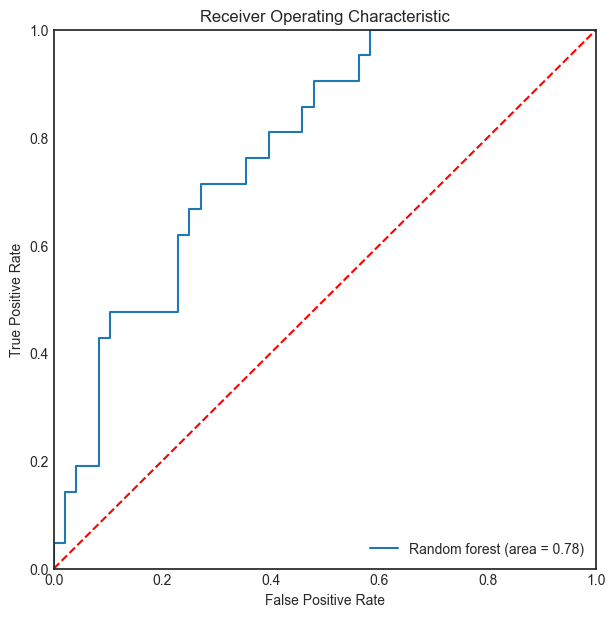

In [173]:
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_pred, model_name):

    roc_auc = roc_auc_score(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr, label= model_name + ' (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    

plot_roc_curve(y_v1_test, predictions_rf_final_proba, 'Random forest')

#### Confusion matrix of the selected model

Based on the confusion matrix results we can confirm that the final random forest model indeed possesses some predictive power. 
* 37 observations were marked as True Negative (people who were not diagnosed with diabetes based on the model predictions were not diagnosed with diabetes in reality)
* 13 observations were marked as True Positive (people who were diagnosed with diabetes based on the model predictions were diagnosed with diabetes in reality)
* 11 observations were marked as False Positive (people who were diagnosed with diabetes based on the model predictions were not diagnosed with diabetes in reality)
* 8 observations were marked as False Negative (people who were not diagnosed with diabetes based on the model predictions were diagnosed with diabetes in reality)

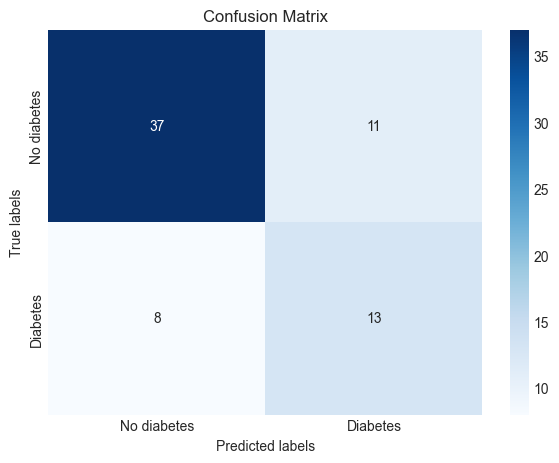

In [172]:
from sklearn.metrics import confusion_matrix 
from matplotlib.ticker import IndexLocator

def plot_conf_matrix(cm):
    # plotting confusion matrix
    fig, ax = plt.subplots(figsize = (7, 5))
    sns.heatmap(cm, annot=True, ax = ax, cmap="Blues", fmt='d')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['No diabetes', 'Diabetes']) 
    ax.yaxis.set_ticklabels(['No diabetes', 'Diabetes'])

    ax.xaxis.set_ticks([0, 2])
    ax.yaxis.set_ticks([0, 2])
    ax.yaxis.set_major_locator(IndexLocator(base=1, offset=0.5))
    ax.xaxis.set_major_locator(IndexLocator(base=1, offset=0.5))
    

cm = confusion_matrix(y_v1_test, predictions_rf_final)

plot_conf_matrix(cm)

## Implementation of the final model

In [174]:
import pickle

filename = './Models/diabetes_model.sav'
pickle.dump(rf_final_model, open(filename, 'wb'))

In [6]:
loaded_model = pickle.load(open('./Models/diabetes_model.sav', 'rb'))

In [7]:
loaded_model

RandomForestClassifier(max_depth=7)

In [13]:
my_data = pd.DataFrame([[3, 89, 70, 29, 0, 20.4, 0.254, 40],
                        [1, 90, 62, 12, 43, 27.2, 0.580, 24],
                        [0, 202, 80, 27, 0, 35.7, 0.798, 56]], 
                       columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

my_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,89,70,29,0,20.4,0.254,40
1,1,90,62,12,43,27.2,0.580,24
2,0,202,80,27,0,35.7,0.798,56


In [14]:
my_data_preprocessed = data_preprocessing(my_data)
my_data_preprocessed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.336306,-0.716514,-0.090536,0.834812,-0.707107,-1.176965,-1.297300,0.000000
1,-0.267261,-0.697658,-1.176965,-1.405999,1.414214,-0.090536,0.161044,-1.224745
2,-1.069045,1.414172,1.267500,0.571187,-0.707107,1.267500,1.136256,1.224745


In [17]:
loaded_model.predict(my_data_preprocessed)

array([0, 0, 1])

The probabilities of being diagnosed with diabetes for new patients are: 13%, 12% and 77%

In [18]:
loaded_model.predict_proba(my_data_preprocessed)

array([[0.86726937, 0.13273063],
       [0.87774569, 0.12225431],
       [0.23320427, 0.76679573]])